# Procesamiento de Imágenes satelitales

## Información sobre estructura de archivos NC

1) Importación de librerías

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import pandas as pd
from pyproj import Proj

2) Seleccionar las rutas de las imágenes

In [7]:
ruta_base = "../data/raw/imagenes_satelitales/"
carpeta_granizo = "2021-02-17_granizo/"
carpeta_no_granizo = "2019-09-12_no_granizo/" # Elegimos una de las que se descargó

3) Creamos la visualización

✅ Secuencias de imágenes encontradas.


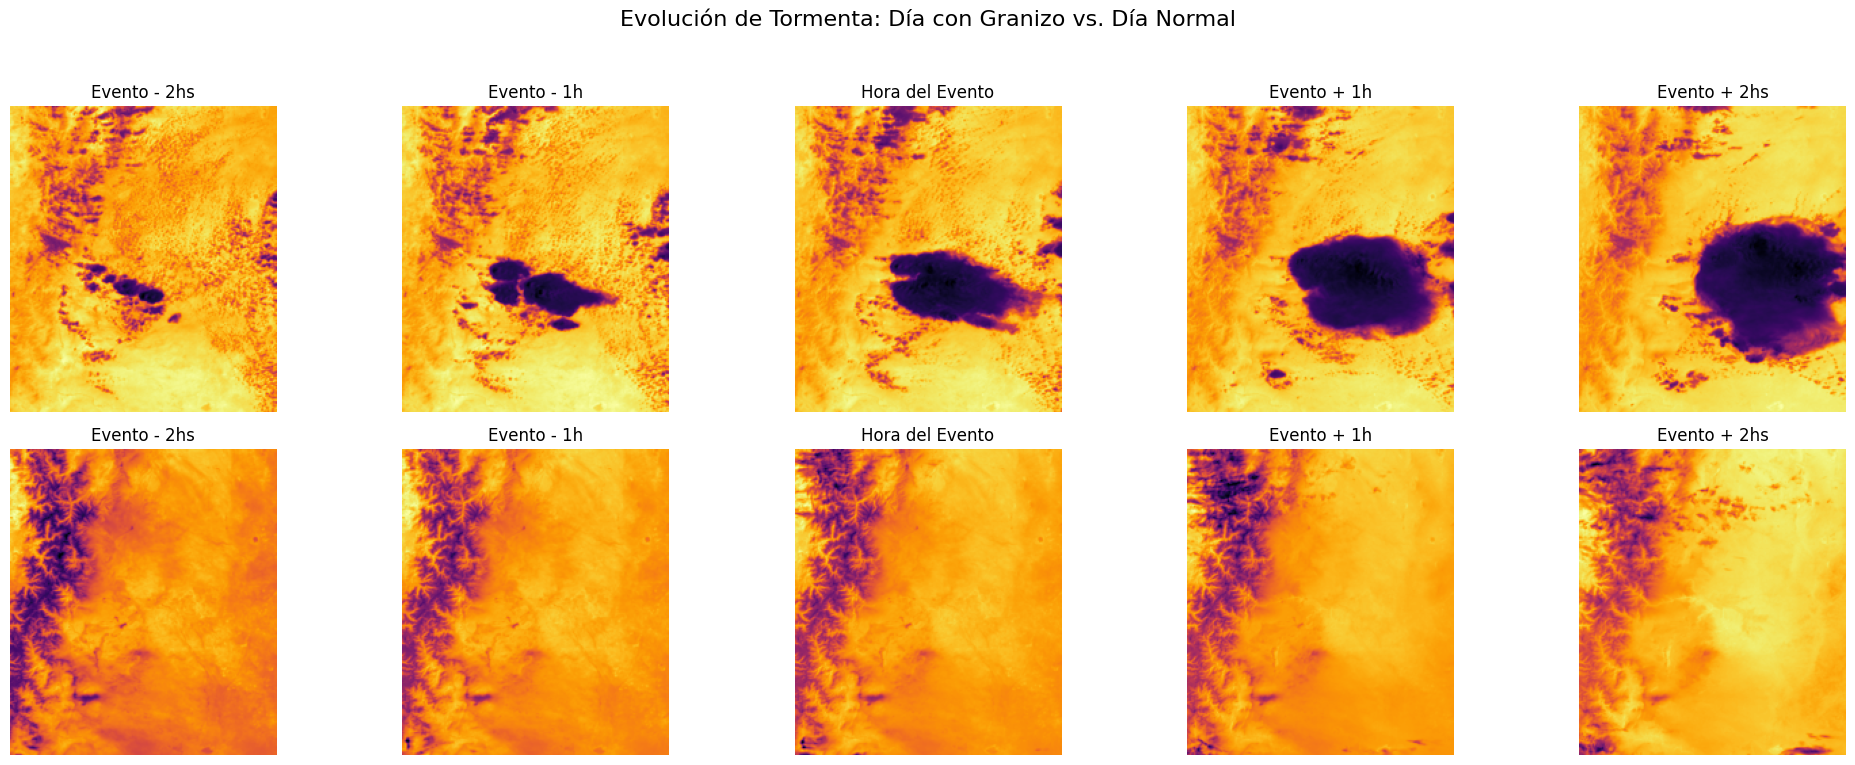

In [10]:
# 1_Cargar las rutas de los archivos de cada secuencia
try:
    ruta_completa_granizo = os.path.join(ruta_base, carpeta_granizo)
    archivos_granizo = sorted([os.path.join(ruta_completa_granizo, f) for f in os.listdir(ruta_completa_granizo)])

    ruta_completa_no_granizo = os.path.join(ruta_base, carpeta_no_granizo)
    archivos_no_granizo = sorted([os.path.join(ruta_completa_no_granizo, f) for f in os.listdir(ruta_completa_no_granizo)])
    
    if len(archivos_granizo) < 5 or len(archivos_no_granizo) < 5:
        raise ValueError("Una de las carpetas no contiene las 5 imágenes necesarias.")
    
    print("✅ Secuencias de imágenes encontradas.")

    # 2_Crear la figura con subplots (2 filas, 5 columnas)
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    fig.suptitle('Evolución de Tormenta: Día con Granizo vs. Día Normal', fontsize=16)

    # Títulos para cada columna de tiempo
    titulos_tiempo = ['Evento - 2hs', 'Evento - 1h', 'Hora del Evento', 'Evento + 1h', 'Evento + 2hs']

    # 3_Graficar la secuencia de GRANIZO (fila de arriba)
    axes[0, 0].set_ylabel('Día con Granizo', fontsize=12)
    for i, ruta_archivo in enumerate(archivos_granizo):
        ds = xr.open_dataset(ruta_archivo)
        # Recortamos la imagen como en el paso anterior
        proj_info = ds.goes_imager_projection
        h_sat = proj_info.perspective_point_height
        ds['x'] = ds['x'] * h_sat
        ds['y'] = ds['y'] * h_sat
        p = Proj(proj='geos', h=h_sat, lon_0=proj_info.longitude_of_projection_origin)
        x1, y1 = p(-70.5, -37.5)
        x2, y2 = p(-66.5, -32.0)
        recorte = ds.sel(x=slice(x1, x2), y=slice(y2, y1))
        
        ax = axes[0, i]
        ax.imshow(recorte['CMI'], cmap='inferno')
        ax.set_title(titulos_tiempo[i])
        ax.axis('off')

    # 4_Graficar la secuencia SIN GRANIZO (fila de abajo)
    axes[1, 0].set_ylabel('Día sin Granizo', fontsize=12)
    for i, ruta_archivo in enumerate(archivos_no_granizo):
        ds = xr.open_dataset(ruta_archivo)
        # Recortamos la imagen
        proj_info = ds.goes_imager_projection
        h_sat = proj_info.perspective_point_height
        ds['x'] = ds['x'] * h_sat
        ds['y'] = ds['y'] * h_sat
        p = Proj(proj='geos', h=h_sat, lon_0=proj_info.longitude_of_projection_origin)
        x1, y1 = p(-70.5, -37.5)
        x2, y2 = p(-66.5, -32.0)
        recorte = ds.sel(x=slice(x1, x2), y=slice(y2, y1))
        
        ax = axes[1, i]
        ax.imshow(recorte['CMI'], cmap='inferno')
        ax.set_title(titulos_tiempo[i])
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except Exception as e:
    print(f"❌ Ocurrió un error: {e}. Revisa las rutas de las carpetas y que contengan 5 imágenes cada una.")

## Otras ejemplificaciones

Importar rutas

In [13]:
ruta_base = "../data/raw/imagenes_satelitales/"
carpeta_granizo = "2017-03-27_granizo/"
carpeta_no_granizo = "2024-12-22_no_granizo/" # Elegimos una de las que se descargó

✅ Secuencias de imágenes encontradas.


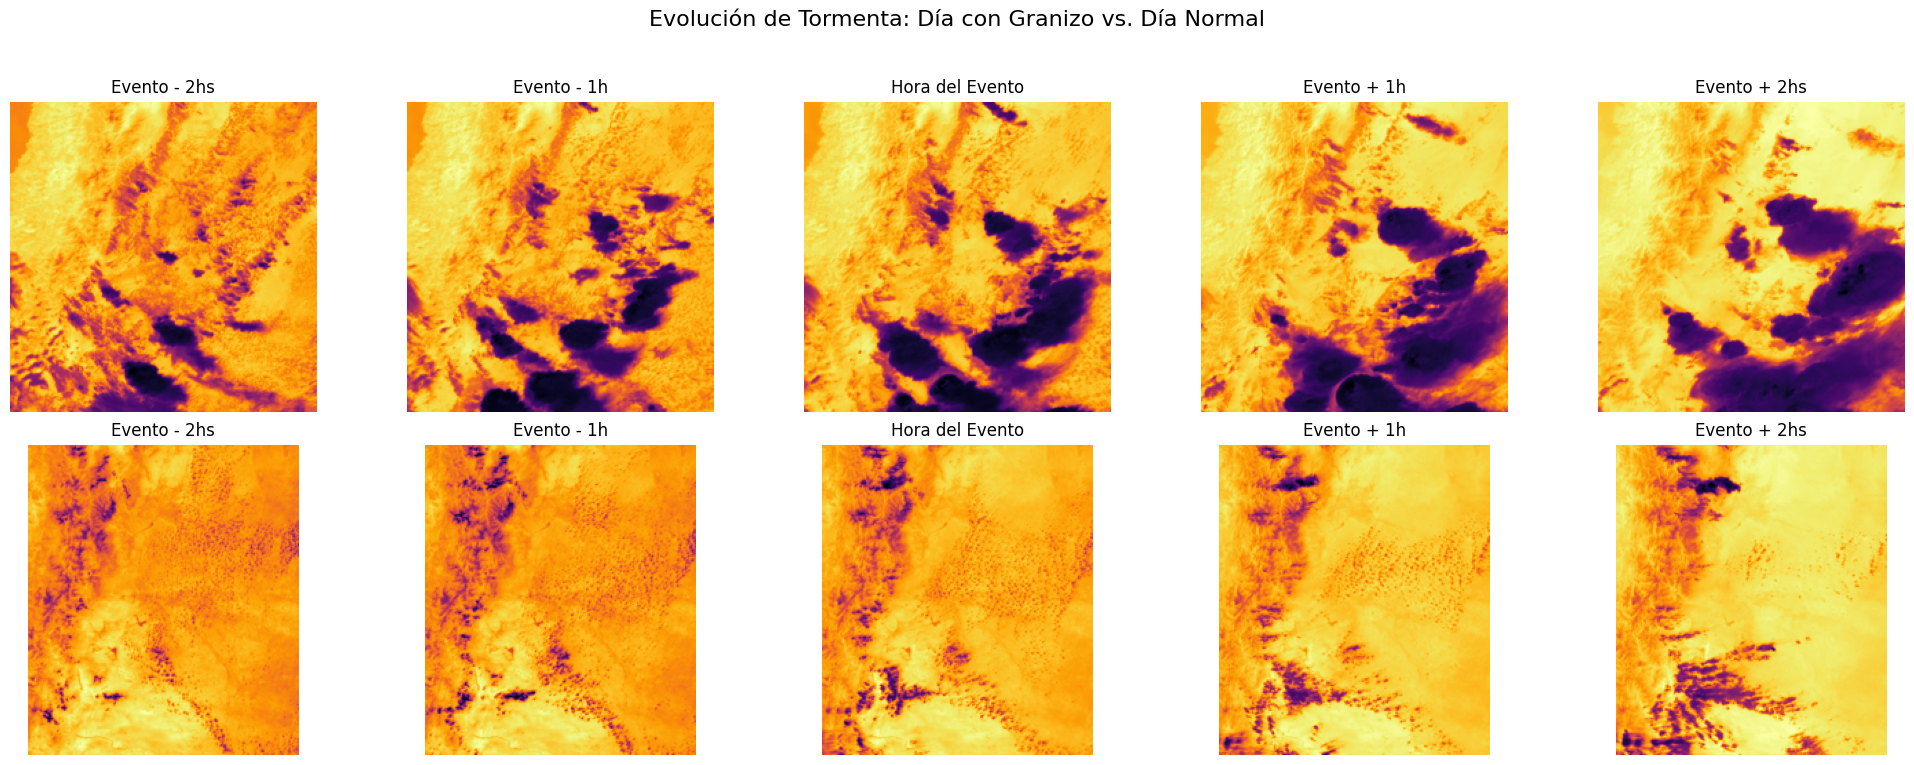

In [14]:
# 1_Cargar las rutas de los archivos de cada secuencia
try:
    ruta_completa_granizo = os.path.join(ruta_base, carpeta_granizo)
    archivos_granizo = sorted([os.path.join(ruta_completa_granizo, f) for f in os.listdir(ruta_completa_granizo)])

    ruta_completa_no_granizo = os.path.join(ruta_base, carpeta_no_granizo)
    archivos_no_granizo = sorted([os.path.join(ruta_completa_no_granizo, f) for f in os.listdir(ruta_completa_no_granizo)])
    
    if len(archivos_granizo) < 5 or len(archivos_no_granizo) < 5:
        raise ValueError("Una de las carpetas no contiene las 5 imágenes necesarias.")
    
    print("✅ Secuencias de imágenes encontradas.")

    # 2_Crear la figura con subplots (2 filas, 5 columnas)
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    fig.suptitle('Evolución de Tormenta: Día con Granizo vs. Día Normal', fontsize=16)

    # Títulos para cada columna de tiempo
    titulos_tiempo = ['Evento - 2hs', 'Evento - 1h', 'Hora del Evento', 'Evento + 1h', 'Evento + 2hs']

    # 3_Graficar la secuencia de GRANIZO (fila de arriba)
    axes[0, 0].set_ylabel('Día con Granizo', fontsize=12)
    for i, ruta_archivo in enumerate(archivos_granizo):
        ds = xr.open_dataset(ruta_archivo)
        # Recortamos la imagen como en el paso anterior
        proj_info = ds.goes_imager_projection
        h_sat = proj_info.perspective_point_height
        ds['x'] = ds['x'] * h_sat
        ds['y'] = ds['y'] * h_sat
        p = Proj(proj='geos', h=h_sat, lon_0=proj_info.longitude_of_projection_origin)
        x1, y1 = p(-70.5, -37.5)
        x2, y2 = p(-66.5, -32.0)
        recorte = ds.sel(x=slice(x1, x2), y=slice(y2, y1))
        
        ax = axes[0, i]
        ax.imshow(recorte['CMI'], cmap='inferno')
        ax.set_title(titulos_tiempo[i])
        ax.axis('off')

    # 4_Graficar la secuencia SIN GRANIZO (fila de abajo)
    axes[1, 0].set_ylabel('Día sin Granizo', fontsize=12)
    for i, ruta_archivo in enumerate(archivos_no_granizo):
        ds = xr.open_dataset(ruta_archivo)
        # Recortamos la imagen
        proj_info = ds.goes_imager_projection
        h_sat = proj_info.perspective_point_height
        ds['x'] = ds['x'] * h_sat
        ds['y'] = ds['y'] * h_sat
        p = Proj(proj='geos', h=h_sat, lon_0=proj_info.longitude_of_projection_origin)
        x1, y1 = p(-70.5, -37.5)
        x2, y2 = p(-66.5, -32.0)
        recorte = ds.sel(x=slice(x1, x2), y=slice(y2, y1))
        
        ax = axes[1, i]
        ax.imshow(recorte['CMI'], cmap='inferno')
        ax.set_title(titulos_tiempo[i])
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except Exception as e:
    print(f"❌ Ocurrió un error: {e}. Revisa las rutas de las carpetas y que contengan 5 imágenes cada una.")

## Conclusiones

Lo que estamos viendo en el gráfico es un patrón clarísimo que una red neuronal convoluciónal (CNN) está diseñada para detectar:

1) Fila de Arriba (Día con Granizo):

Evolución: Se ve una clara evolución temporal. La tormenta (la mancha oscura/morada) crece en tamaño e intensidad a medida que se acerca a la "Hora del Evento".

Firma Visual: En la "Hora del Evento" y en "Evento + 1h", la nube muestra un centro de color morado muy oscuro, casi negro. Como ya sabemos, esto representa topes de nubes extremadamente fríos, la firma clásica de una tormenta severa con un updraft (corriente ascendente) lo suficientemente fuerte como para generar granizo.

2) Fila de Abajo (Día sin Granizo):

Evolución: No hay una evolución clara. Vemos nubes dispersas o un cielo mayormente despejado que no cambia significativamente a lo largo de las 5 horas.

Firma Visual: No hay ninguna “explosión” de nubes con topes fríos. El color se mantiene en el rango amarillo/naranja, indicando temperaturas mucho más cálidas. 
